In [1]:
pip install h5py

Note: you may need to restart the kernel to use updated packages.


In [2]:
 pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import h5py
import cv2
import matplotlib.pyplot as plt
import numpy as np
db = h5py.File('C:\\Users\\gilad\\Desktop\\font\\SynthText.h5', 'r')
im_names = list(db['data'].keys())

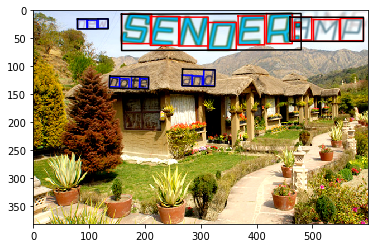

20
Skylark


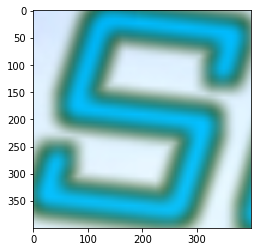

Skylark


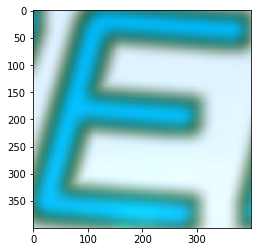

Skylark


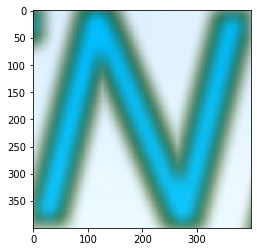

Skylark


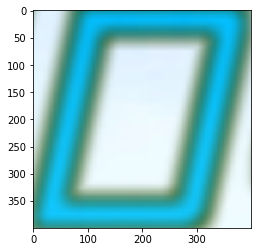

Skylark


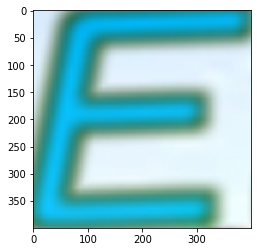

Skylark


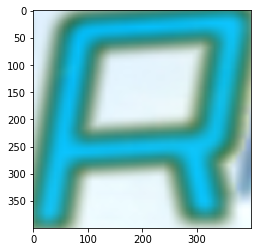

Skylark


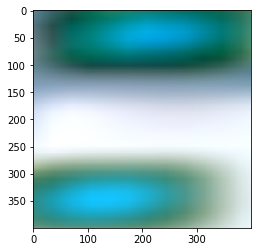

Ubuntu Mono


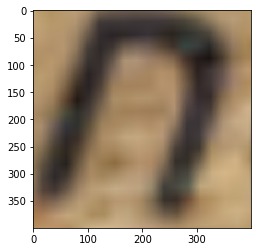

Ubuntu Mono


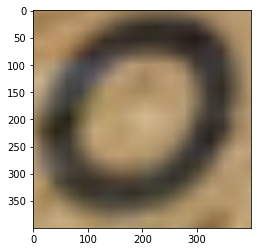

Ubuntu Mono


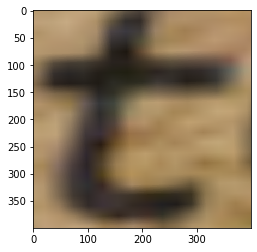

Ubuntu Mono


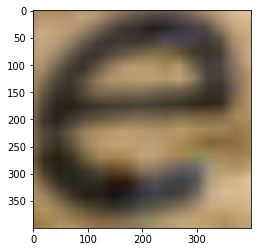

Skylark


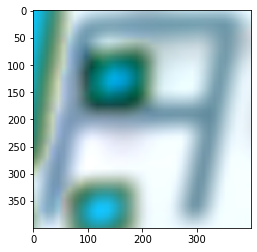

Skylark


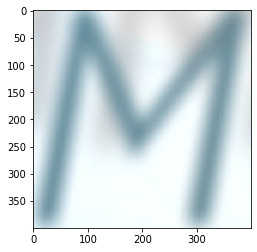

Skylark


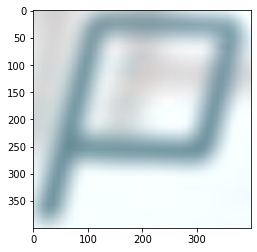

Ubuntu Mono


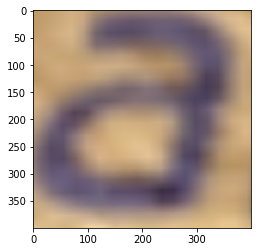

Ubuntu Mono


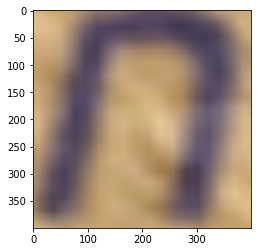

Ubuntu Mono


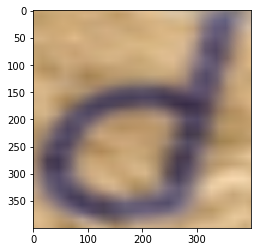

Ubuntu Mono


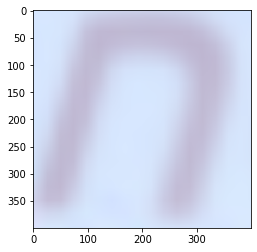

Ubuntu Mono


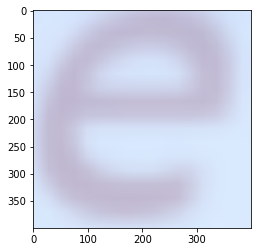

Ubuntu Mono


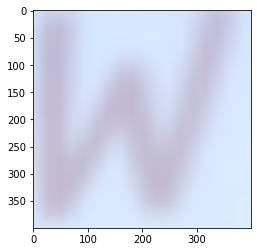

In [6]:
im = im_names[700]
imgs = db['data'][im][:]
font = db['data'][im].attrs['font']
txt = db['data'][im].attrs['txt']
charBB = db['data'][im].attrs['charBB']
wordBB = db['data'][im].attrs['wordBB']

font_name = ['Skylark', 'Ubuntu Mono', 'Sweet Puppy']

nC = charBB.shape[-1]
plt.figure()
plt.imshow(imgs)
for b_inx in range(nC):
    if(font[b_inx].decode('UTF-8')==font_name[0]):
        color = 'r'
    elif(font[b_inx].decode('UTF-8')==font_name[1]):
        color = 'b'
    else:
        color = 'g'
    bb = charBB[:,:,b_inx]
    x = np.append(bb[0,:], bb[0,0])
    y = np.append(bb[1,:], bb[1,0])
    plt.plot(x, y, color)
nW = wordBB.shape[-1]
for b_inx in range(nW):
    bb = wordBB[:,:,b_inx]
    x = np.append(bb[0,:], bb[0,0])
    y = np.append(bb[1,:], bb[1,0])
    plt.plot(x, y, 'k')
plt.show()
i=0
print(len(charBB[0,0]))
for i in range(len(charBB[0,0])):
        pts1 = np.float32([charBB[:,:,i].T[0],charBB[:,:,i].T[1],charBB[:,:,i].T[3],charBB[:,:,i].T[2]])
        pts2 = np.float32([[0,0],[400,0],[0,400],[400,400]])
        M = cv2.getPerspectiveTransform(pts1,pts2)
        dst = cv2.warpPerspective(imgs,M,(400,400))
        plt.imshow(dst)
        print(font[i].decode('UTF-8'))
        plt.show()